<a href="https://colab.research.google.com/github/ZoubirCHATTI/03_Fourier_analysis/blob/main/02_Audio_Hum_Removal/notebooks/02_Hum_Effect_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hum Effect Removal**

In this notebook, we demonstrate how to remove a synthetic hum from an audio file. Using the Fourier transform, we identify the hum and its harmonics (50, 100, 150, 200 Hz) and show their presence in the spectrum. We then clean the signal using notch filters, effectively attenuating the hum while preserving the rest of the audio.

**01_Uploading and playing of the audio file**

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
import requests

In [2]:
#Uploading the audion file with Hum effect
#Originally this audio was clean, we generated and added synthetic hum effect:
url = "https://raw.githubusercontent.com/ZoubirCHATTI/03_Fourier_analysis/main/02_Audio_Hum_Removal/data/02.wav"
filename='02.wav'

In [3]:
r = requests.get(url)
with open(filename, "wb") as f:
    f.write(r.content)

In [4]:
#Reading the audio file
fs, s_hum=wavfile.read(filename)

#Defining time domain
t=np.linspace(0, len(s_hum)/fs, len(s_hum))

In [5]:
#Playing the audio file with the Hum efffect
Audio(s_hum, rate=fs/2)

In [6]:
#Calculating the Fourier transform of the audio with the hum effect
fft_s_hum=np.fft.fft(s_hum)
freq=np.fft.fftfreq(len(s_hum), d=t[1]-t[0])

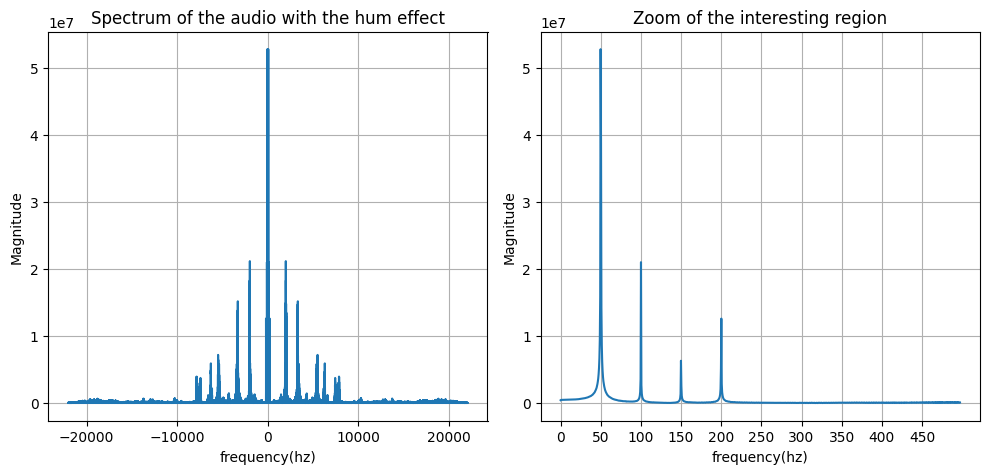

In [7]:
#We plot the Fourier trasform of the audio file, and zooming the region where the hum components are present
plt.figure(figsize=(10, 5))
plt.subplot(1 , 2  , 1)
plt.plot(freq, np.abs(fft_s_hum))
plt.xlabel('frequency(hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of the audio with the hum effect')
plt.grid(True)
plt.subplot(1 , 2 , 2)
plt.plot(freq[0:1000], np.abs(fft_s_hum[0:1000]))
plt.xlabel('frequency(hz)')
plt.ylabel('Magnitude')
plt.title('Zoom of the interesting region')
plt.xticks(np.arange(0 , 500 , 50))
plt.grid(True)
plt.tight_layout()

**02_Applying the notch filter to remove the Hum effect**

In [26]:
from scipy.signal import iirnotch, filtfilt
# iirnotch: function to design a digital notch (band-stop) filter to remove a specific frequency
# filtfilt: function to apply a filter forward and backward to a signal, ensuring zero phase distortion

Q=20                                        #Quality factor
s_hum_copy=s_hum.copy()                     #creation of a copy of the signal, in order to keep the original
harmonics=[50, 100 , 150 , 200]              #From the spectrum of the audio signal, we defined Hum effect frequencies

for f0 in harmonics:
  b , a=iirnotch(f0, Q, fs)                 #Defining the digital notch (band_stop)
  s_filtered=filtfilt(b, a, s_filtered)     #Applying the filter to remove the hum effect

In [27]:
#Playing the filtered signal
Audio(s_filtered, rate=fs/2)

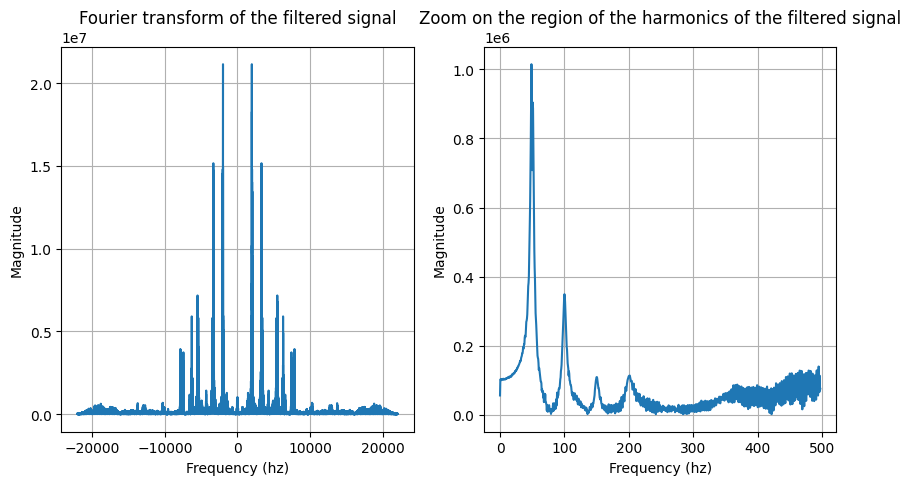

In [30]:
#Plot of the Fourier transform of the filtered signal
plt.figure(figsize=(10 , 5))
plt.subplot(1 , 2 , 1)
plt.plot(freq, np.abs( np.fft.fft(s_filtered)))
plt.xlabel('Frequency (hz)')
plt.ylabel('Magnitude')
plt.title('Fourier transform of the filtered signal')
plt.grid(True)
plt.subplot(1 , 2 , 2)
plt.plot(freq[0:1000],np.abs( np.fft.fft(s_filtered)[0:1000]))
plt.xlabel('Frequency (hz)')
plt.ylabel('Magnitude')
plt.title('Zoom on the region of the harmonics of the filtered signal')
plt.grid(True)
